# POSTTEST 2

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("StudentsPerformance.csv")

In [6]:
desc_stats = df.describe().T

### Statistik Deskriptif Dataset

In [7]:
print(desc_stats)

                count    mean        std   min    25%   50%   75%    max
math score     1000.0  66.089  15.163080   0.0  57.00  66.0  77.0  100.0
reading score  1000.0  69.169  14.600192  17.0  59.00  70.0  79.0  100.0
writing score  1000.0  68.054  15.195657  10.0  57.75  69.0  79.0  100.0


### 10 Record Pertama Dataset Numerik

In [8]:
numeric_df = df.select_dtypes(include='number')
print(numeric_df.head(10))

   math score  reading score  writing score
0          72             72             74
1          69             90             88
2          90             95             93
3          47             57             44
4          76             78             75
5          71             83             78
6          88             95             92
7          40             43             39
8          64             64             67
9          38             60             50


### Info Dataset

In [9]:
num_records = df.shape[0]
num_attributes = df.shape[1]
attribute_names = df.columns.tolist()
num_numeric_attributes = numeric_df.shape[1]

print(f"\nJumlah record    : {num_records}")
print(f"Jumlah attribute : {num_attributes}")
print(f"Nama attribute   : {attribute_names}")
print(f"Jumlah attribute numerik: {num_numeric_attributes}\n")


Jumlah record    : 1000
Jumlah attribute : 8
Nama attribute   : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']
Jumlah attribute numerik: 3



### Jumlah Label Atribut Object

In [10]:
object_df = df.select_dtypes(include='object')
unique_labels = {col: object_df[col].nunique() for col in object_df.columns}

print("\n")
for col, val in unique_labels.items():
    print(f"{col} : {val}")
print("\n")



gender : 2
race/ethnicity : 5
parental level of education : 6
lunch : 2
test preparation course : 2




### Visualisasi Grafik Histogram (Math Score)

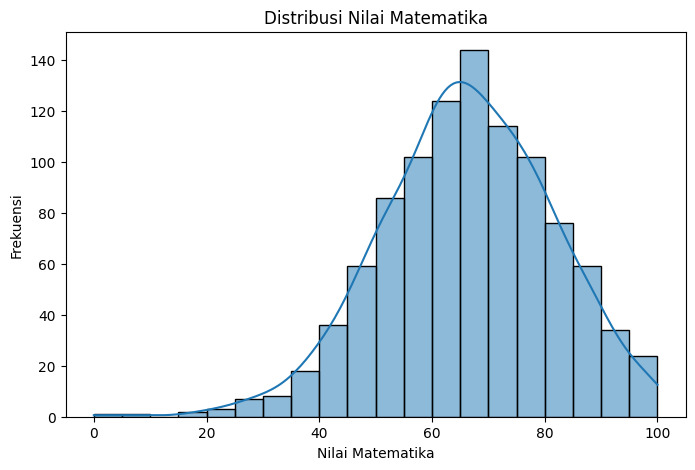

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df["math score"], bins=20, kde=True)
plt.title("Distribusi Nilai Matematika")
plt.xlabel("Nilai Matematika")
plt.ylabel("Frekuensi")
plt.show()

##### Dari diagram histogram di atas didapatkan bahwa mayoritas siswa memperoleh nilai di kisaran 50–80. Distribusi nilai matematika cenderung normal, dengan puncak frekuensi berada di sekitar 60–70. Terdapat sebagian kecil siswa yang mendapat nilai sangat rendah (0–20) maupun sangat tinggi (90–100). Hal ini menunjukkan bahwa sebagian besar siswa memiliki kemampuan matematika pada tingkat menengah, sedangkan siswa yang berprestasi sangat tinggi maupun sangat rendah jumlahnya relatif sedikit.

### Visualisasi Korelasi Dataset (Atribut Numerik)

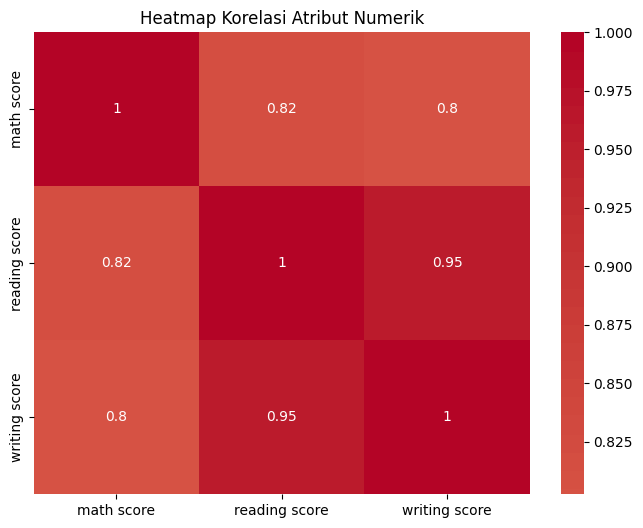

In [12]:
plt.figure(figsize=(8,6))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi Atribut Numerik")
plt.show()

##### Dari heatmap korelasi di atas didapatkan bahwa terdapat hubungan yang sangat kuat antara nilai membaca (reading score) dan menulis (writing score) dengan nilai korelasi mendekati 1.0. Artinya, siswa yang memiliki kemampuan membaca yang baik cenderung memiliki kemampuan menulis yang baik pula. Selain itu, nilai matematika (math score) juga berkorelasi positif dengan nilai membaca dan menulis, meskipun tingkat korelasinya lebih rendah (sekitar 0.6–0.7). Hal ini menunjukkan bahwa meskipun ada hubungan antara kemampuan matematika dan kemampuan bahasa, namun hubungan terkuat tetap terlihat antara membaca dan menulis.

## Kesimpulan Analisis Data StudentsPerformance

1. **Statistik Deskriptif**
   - Rata-rata nilai **Matematika (66.09)**, **Membaca (69.17)**, dan **Menulis (68.05)** menunjukkan bahwa kemampuan siswa berada di level **menengah**.
   - Rentang nilai cukup lebar (**0–100**) pada Matematika, artinya ada siswa yang sangat lemah maupun sangat unggul.
   - Kuartil (Q1, Q2, Q3) menunjukkan bahwa 50% siswa memiliki nilai:
     - Matematika antara **57–77**
     - Membaca antara **59–79**
     - Menulis antara **58–79**

2. **Distribusi Nilai Matematika (Histogram)**
   - Dari diagram histogram didapatkan bahwa mayoritas siswa memperoleh nilai **50–80**, dengan puncak frekuensi di sekitar **60–70**.
   - Distribusi nilai cenderung **normal**, meskipun terdapat outlier dengan nilai sangat rendah (0–20) dan sangat tinggi (90–100).
   - Hal ini menunjukkan bahwa sebagian besar siswa memiliki kemampuan matematika yang rata-rata, hanya sedikit siswa yang sangat rendah/tinggi.

3. **Hubungan Antar Nilai (Heatmap Korelasi)**
   - Terdapat **korelasi sangat kuat** antara **Reading score** dan **Writing score** (mendekati 1.0).
   - Nilai Matematika juga berkorelasi positif dengan Reading dan Writing, tetapi lebih rendah (sekitar **0.6–0.7**).
   - Kesimpulannya, kemampuan bahasa (membaca & menulis) saling mendukung dengan sangat erat, sementara kemampuan matematika masih berkaitan tetapi tidak sekuat hubungan antar kemampuan bahasa.

4. **Variabel Kategori**
   - Dataset memiliki variabel kategori seperti **gender, race/ethnicity, parental education, lunch, dan test preparation**.
   - Analisis lebih lanjut (misalnya boxplot) bisa digunakan untuk melihat perbedaan nilai antar kategori tersebut.
   - Contohnya, apakah gender berpengaruh pada Math Score, atau apakah program persiapan ujian (test preparation) meningkatkan skor siswa.

---

### Kesimpulan Utama
- Sebagian besar siswa berada di **tingkat menengah** dalam ketiga bidang (Math, Reading, Writing).  
- **Kemampuan bahasa** (reading & writing) memiliki hubungan paling erat, sehingga siswa yang kuat membaca hampir pasti kuat menulis.  
- **Math Score** memiliki variasi yang besar dan lebih terdistribusi lebar, sehingga cocok dijadikan **variabel target** untuk prediksi/permodelan machine learning.  
- Faktor non-akademik (gender, latar belakang orang tua, persiapan ujian) berpotensi memberikan pengaruh terhadap performa siswa dan bisa menjadi fokus analisis lanjutan.  


# POSTTEST 3

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Data Cleaning

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [36]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0
average score,0
math_category,1


In [14]:
print("Jumlah duplikat :", df.duplicated().sum())

Jumlah duplikat : 0


In [15]:
outlier_mask = (df["math score"] < 0) | (df["math score"] > 100) | \
               (df["reading score"] < 0) | (df["reading score"] > 100) | \
               (df["writing score"] < 0) | (df["writing score"] > 100)

print("Jumlah outlier berdasarkan rentang 0–100:", outlier_mask.sum())

Jumlah outlier berdasarkan rentang 0–100: 0


#####
1. Berdasarkan hasil df.info(), tidak terdapat missing value pada dataset.
2. Duplikat data diperiksa menggunakan df.duplicated(), namun tidak ada duplikat pada dataset ini.
3. Karena atribut numerik dalam dataset ini berupa **nilai ujian siswa**, maka secara logis nilai yang valid hanya berada pada rentang **0 sampai 100**.
4. Outlier didefinisikan sebagai nilai yang **kurang dari 0** atau **lebih dari 100**.




### Normalisasi/standarisasi kolom numerik

In [16]:
df['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8])

In [18]:
scaler = MinMaxScaler()
df[['math score', 'reading score', 'writing score']] = scaler.fit_transform(
    df[['math score', 'reading score', 'writing score']]
)

In [25]:
print("Nilai setelah normalisasi\n")
df['math score'].unique()

Nilai setelah normalisasi



array([0.72, 0.69, 0.9 , 0.47, 0.76, 0.71, 0.88, 0.4 , 0.64, 0.38, 0.58,
       0.65, 0.78, 0.5 , 0.18, 0.46, 0.54, 0.66, 0.44, 0.74, 0.73, 0.67,
       0.7 , 0.62, 0.63, 0.56, 0.97, 0.81, 0.75, 0.57, 0.55, 0.53, 0.59,
       0.82, 0.77, 0.33, 0.52, 0.  , 0.79, 0.39, 0.45, 0.6 , 0.61, 0.41,
       0.49, 0.3 , 0.8 , 0.42, 0.27, 0.43, 0.68, 0.85, 0.98, 0.87, 0.51,
       0.99, 0.84, 0.91, 0.83, 0.89, 0.22, 1.  , 0.96, 0.94, 0.48, 0.35,
       0.34, 0.86, 0.92, 0.37, 0.28, 0.24, 0.26, 0.95, 0.36, 0.29, 0.32,
       0.93, 0.19, 0.23, 0.08])

##### Normalisasi dilakukan menggunakan MinMaxScaler agar seluruh skor berada pada rentang [0,1]. Tujuannya agar setiap fitur numerik memiliki skala yang seimbang, sehingga tidak mendominasi fitur lain saat dilakukan pemodelan machine learning.

### Encoding Kolom Kategorikal

In [26]:
le = LabelEncoder()
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    df[col] = le.fit_transform(df[col])


In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,0,1,1,1,1,0.72,0.662651,0.711111,0.697921
1,0,2,4,1,0,0.69,0.879518,0.866667,0.812062
2,0,1,3,1,1,0.90,0.939759,0.922222,0.920660
3,1,0,0,0,1,0.47,0.481928,0.377778,0.443235
4,1,2,4,1,1,0.76,0.734940,0.722222,0.739054


##### Kolom kategorikal diubah menjadi bentuk numerik menggunakan LabelEncoder agar model machine learning dapat memprosesnya. Setiap kategori diberi representasi angka unik tanpa mengubah makna kategorinya.

### Feature Engineering

In [20]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

##### Membuat fitur baru bernama average score yang merepresentasikan rata-rata dari tiga skor ujian. Fitur ini dapat membantu model memahami kinerja keseluruhan siswa secara lebih komprehensif.

### Splitting Data (Train-Test Split)

In [21]:
X = df.drop(columns=['average score'])
y = df['average score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### Dataset dibagi menjadi data latih (80%) dan data uji (20%) untuk menguji kemampuan generalisasi model. Pembagian dilakukan secara acak namun tetap konsisten dengan random_state = 42.

In [22]:
print("Jumlah data training :", X_train.shape[0])
print("Jumlah data testing  :", X_test.shape[0])

Jumlah data training : 800
Jumlah data testing  : 200


##### Tahap ini bertujuan untuk memisahkan dataset menjadi dua bagian, yaitu:

- **Data Training (80%)** → digunakan untuk melatih model
- **Data Testing (20%)** → digunakan untuk menguji performa model pada data baru

##### Proses ini menggunakan fungsi train_test_split() dari library sklearn.model_selection dengan parameter:
- test_size=0.2 artinya 20% data dijadikan data uji
- random_state=42 agar pembagian data bersifat konsisten (reproducible)

##### Dengan cara ini, kita bisa memastikan bahwa model tidak hanya menghafal data latih, tetapi juga mampu **menggeneralisasi** saat diberikan data baru.


# **Kesimpulan Keseluruhan**

### 1. Analisis Awal Data
- Dataset berisi **1000 data siswa** dengan **8 atribut**.
- Tidak ditemukan **missing value** dan **data duplikat**.
- Atribut numerik terdiri dari math score, reading score, dan writing score dengan nilai berkisar antara **0 hingga 100**.
- Atribut kategorikal meliputi: gender, race/ethnicity, parental level of education, lunch, dan test preparation course.

---

### 2. Data Cleaning
- Tidak ada data yang hilang atau duplikat.
- Pengecekan outlier menunjukkan semua skor masih berada dalam batas wajar (0–100).
- Pengecekan outlier menunjukkan semua skor masih berada dalam batas wajar (0–100).

---

### 3. Normalisasi & Encoding
- Kolom numerik (math score, reading score, writing score) telah dinormalisasi menggunakan **MinMaxScaler**, sehingga nilainya berada dalam rentang [0,1].
- Kolom kategorikal (gender, race/ethnicity, parental level of education, lunch, test preparation course) telah diubah menjadi numerik menggunakan **LabelEncoder**, agar dapat digunakan dalam model machine learning.

---

### 4. Feature Engineering
- Dibuat fitur baru bernama **average score** yang merupakan rata-rata dari ketiga skor (math, reading, writing).
- Fitur ini memberikan gambaran umum performa akademik setiap siswa secara keseluruhan.

---

### 5. Splitting Data
- Dataset dibagi menjadi:
  - **80% data training** (untuk melatih model)
  - **20% data testing** (untuk evaluasi model)
- Pembagian menggunakan train_test_split() dengan random_state=42 agar hasilnya konsisten.

---
Secara keseluruhan, dataset telah melalui proses **analisis dan preprocessing** meliputi:
1. Pemeriksaan dan pembersihan data (cleaning)
2. Transformasi numerik dan kategorikal (normalisasi & encoding)
3. Pembuatan fitur baru yang relevan (feature engineering)
4. Pembagian data untuk keperluan modeling (train-test split)

